# Stock Correlation Analysis

In [ ]:
import os
os.chdir('C:\\Users\\hesam\\Stock_analysis_python')

# Background

**Correlation coefficient is a centeral component of Modern Portfolio Theory (MPT).** MPT stresses that investors should look for a consistently uncorrelated pool of assets to limit risk. In prctical terms, that virtually guarantees a diversified portfolio.

Correlation statistics can be used in finance and investing. The correlation coefficient has limited ability in predicting returns in the stock for individual stocks. Still, the statistical measurement may have value in predicting the extent to which two stocks move in relation to each other because the correlation coefficient is a measure of the relationship between how two stocks move in tandem with each other, as well as the strength of that relationship. 

Here is a sample of common type of visualization of correlation coefficient that is used for security invesments.

<img src="image/2017correl.png">

### Correlation Coefficient

Correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The Values range between -1.0 and 1.0. A correlation of -1.0 shows a perfect negative correlation while a correlation of 1.0 shows a perfect positive correlation.
There are several types of correlation coefficients, but the one that is most common is the pearson correlation (r). This measures the strength and direction of the linear relationship between two variables. <a href="https://www.investopedia.com/terms/c/correlationcoefficient.asp"> Source: Investopedia.com</a>

### Problem with Correlation Coefficient

One of the main criticisms of MPT is that **it assumes the correlation between assets is static over time**. In reality, correlations often shift, especially during periods of higher volatility. (<a href="https://www.investopedia.com/ask/answers/051315/how-can-i-use-correlation-coefficient-predict-returns-stock-market.asp#:~:text=The%20correlation%20coefficient%20is%20measured,direction%20by%20the%20same%20amount.">Investopedia.com</a>)

# Project Objective

In this project I want to use historical data for stock prices to represent a new way of looking at correlation between stocks that considers changes in the correlation coefficient over time. In other words, I want to use data to help investors diversify their investment portfolio by having a better understanding of stock price correlations over time.

By considering the changes in the stock price of a company and comparing those changes with other companies, I hope to get some insights on the relations between companies that cannot be easily understood by following news or studying static correlation coefficient tables. 

# Project Stages

This project had been passed 5 stages of progress to get to this point:
- Stage 1: Gathering Data
- Stage 2: Cleaning and Processing Data
- Stage 3: Converting Data to Pandas DataFrame
- Stage 4: Visualizing Data

# Stage 1: Gathering Data

## <font color="green">Challenge: Connecting to API and save updatable datasets on local machine</font>

for gathering required data, I was trying to use [finnhub.io](http://finnhub.io) API as the source where I can get data from. This API had a good documentation and I was able to connect to the API and get the data easily by using the following lines of code and save the data in .csv files on my computer:

In [ ]:
#Set start and end date here and by running update_dataset function, the functions in this cell will be automatically called

start_date = "01/01/2019"
till_date = "01/01/2020"
def get_dates():
    return start_date, till_date

# Helper functions for converting human-readable dates 
def date_convertor(date):
    '''
        date_convertor function takes the human readable date in DD/MM/YYYY format and returns Unix
    Timestamp in integer format
    '''
    #convert the time to UNIX timestamp
    import time
    result = int(time.mktime(time.strptime(date, "%d/%m/%Y")))
    return result #Returns Integer type
    

def timestamp_convertor(timestamp):
    """
    UNIX timestamp convertor

    timestamp_converot function takes the UNIX timestamp format and returns human readable date in
    YYYY/MM/DD format
    """
    import datetime
    result = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d')
    return result #Returns String type

In [ ]:
#Run this function on
def get_companies_info():
    with open ("data_sets\\S&P500-Info.csv","r") as f:
        companies = f.readlines()
    
    
    company_list = []
    company_dictionary = {}
    
    for line in companies:
        line_list = line.strip('\n').split(",")
        company_list.append(line_list)
        # company_dictionary[line[1]]=line[2:]
    # symbols = companies[:]
    #print (company_list)
    dictionary_guide ={}
    dictionary_guide[company_list[0][1]]=company_list[0][2:]
    
    
    #print("Dictionary Guide: ",dictionary_guide)
    
    #get 100 companies in SP500
    for company in company_list[0:101]:
        company_dictionary[company[1]]=company[2:]
        
    return company_dictionary

In [ ]:
companies = get_companies_info()

### <font color = red>Run update_dataset function just one time to update all the csv files on the directory</font>

In [ ]:
def update_dataset():
    '''
    Function for updating all the files in the database
    '''
    
    start_date, end_date = get_dates()

    import os
    import finnhub
    import pandas as pd

       
    companies = get_companies_info()
    
    start_date, end_date = date_convertor(start_date), date_convertor(end_date)
    print(start_date, end_date)
    
    os.chdir("data_sets")
    
    # Setup client for Finnhub API
    finnhub_client = finnhub.Client(api_key ="bui229f48v6rfhsb6s50")
    
    for company in companies:
        try:
            print(company)   
            # Stock candles
            res = finnhub_client.stock_candles(company, 'D', start_date, end_date)
            #print(res)
            
            #Convert to Pandas Dataframe 
            response = pd.DataFrame(res)  
            
            #Write the CSV file out of data frame
            response_csv = response.to_csv(f"{company}.csv")
        except:
            print(company, 'no data found ...')

In [ ]:
update_dataset()

In [ ]:
with open ("data_sets\\AAPL.csv","r") as f:
        sample = f.readlines()

In [ ]:
sample

# Stage 2: Cleaning and Processing Data

## <font color="green">Challenge: Calculating price changes for each pair of consecutive days </font>

the output of the last step is 100 csv files saved on the computer. These files contain stock price of each company for each day within the timeframe specified. However, what I need is the price change from day to day. For this purpose I considered the 'closing' price as the one that I need. Now I have to read each file, get the closing price of each day and calculate the 

(c_day(n) - c_day(n-1)) where 'c' is the closing price.

To do the job, I first defined a function for reading each file and used a for loop to go over all the files and read them:

In [ ]:
def get_company_data(company):
    '''
    Function for returning information about specific company
    '''
    os.getcwd()
    with open (f"{company}.csv", "r") as c:
        company_data = c.readlines()
    return company_data[1:]

### Defining a data structure to keep all required data in a single object

For the purpose of this project, I need 3 data points for my calculations:
- Price change in each pair of dates
- Percent of change in each pair of dates
- A pair of consecutive dates

In [ ]:
#Object for having a data structure for the type of information that I want to store for my 
#furthur calculations in the program

class DeltaObject:
    def __init__(self, delta_change, percent_change, dates):
        self.change = delta_change
        self.percent = percent_change
        self.dates = dates
    def __repr__(self):
        return f'{self.change},{self.percent},{self.dates}'

Now I can create a dictionary in which each company will be a key in this dictionary and a list of all objects of type DeltaObject is the value for that key. 

In [ ]:
def refine_companies_records():
    '''
    Function for getting a dictionary for all the changes in prices in the gathered files
    and calculating price changes 
    ''' 
    import os
    from classes import DeltaObject
    
    companies = get_companies_info()
    os.chdir('data_sets')
    files = os.listdir()
    companies_records = {}
    
    #get company data for each company that exists in file directory
    for company in companies:
        #print (True)
        if (company + '.csv') in files:
            # print('in files: ', True)
            company_data = get_company_data(company)
            
        #get close prices in a list to use for calculating price change and percent change
            close_price_list = []
            for line in company_data:
                date_price = []
                line = line.strip('\n').split(',')
                #close_price_list.append(line[1])
                date_price.append(line[1])
                date_price.append(line[6])
                close_price_list.append(date_price)
            
            
        #calculate the change in prices each day, percent change and pair of dates and use these datapoints to creaat an instance
        #of DeltaObject and append it to the change_list. 
            change_list = []
            for i in range(1,len(close_price_list)):    
                delta_change = float(close_price_list[i][0]) - float(close_price_list[i-1][0])
                percent_change = delta_change / float(close_price_list[i-1][0])
                dates =(close_price_list[i-1][1],close_price_list[i][1])
                               
                change_list.append(DeltaObject(delta_change,percent_change,dates))
                
            #Create an item in the dictionary of companies_records in which company is the key and change_list is the value
            companies_records[company]= change_list
                     
    return companies_records

In [165]:
companies_records = refine_companies_records()

# Stage 3: Converting Data to DataFrame to create a graph 

## <font color="green">Challenge: Values at DataFrame must represent colors </font>

The goal of this project is to distill the data into a simple graph that shows the interdependencies between companies' stock prices. 

Up to this point, I have a dictionary named `companies_records` that  entails all the information needed for price changes for each couple of existing dates in the specified timeframe.

The idea is to get a graph like this:

<img src = "image/Frame_6.jpg" style= "width:400px;">

### This graph shows the comparison of companies W, X, Y, Z with company A in the timeframe of D1-D5. 
For example if changes in the stock price of company A is in alignment with changes in company X (i.e. both increase or both decrease), we should have a green square and if they are not (eg. A is increasing but the other one is decreasing), we should have a red square in the graph. The opacity of the color also shows the extent to which changes are same or opposite.

### My Plan to get to this graph
For getting such output, I figured out that 

- **I need to change my data to a dictionary in which keys are delta times, and the value for each delta time is a color tuple.**

- Since I am going to use `matplotlib` library as the plotting library in Python, **I can manage the color with a tuple of `(red, green, blue, alpha)`.** 

- Since I only want to have two colors with different opacities, I must use one of these for each datapoint:

    `(1,0,0,alpha)` for varieties of red

    `(0,1,0,alpha)` for varieties of green
    

**Therefore for each  `DeltaObject` that I defined before and its values exist in the `company_data` dictionary, I can define a color tuple.** For example, if we want to get the first colored square of company 'C' in comparison with company 'A', we have to do the following:

```python
company_data = {'A':[DeltaObject0, DeltaObject1, ...], 'B': [DeltaObject0, DeltaObject1, ...], ...}

selected_company = 'C'
date_0_c = company_data['C'][0].dates
change_0_c = company_data['C'][0].change
percent_0_c = company_data['C'][0].percent

#data for company A
date_0_A = company_data['A'][0].dates
change_0_A = company_data['A'][0].change
percent_0_A = company_data['A'][0].percent

change = change_0_c * change_0_A#for determining the color
percent = percent_0_A/percent_0_c#for determining the color opacity

if change >0:
	color = (0,1,0, percent)#Green color with aplpha = percent
else:
	color = (1,0,0,percent)# Red color with alpha = percent

```


For going with this planb, the following function helps me to calculate all the datapoints in the time range specified by the user. This function takes the company data as a list of object from the DeltaObject class instances and returnas a neste dictionary in this format:

`{time:{company_1:(Color tuple,..., company_n:(color_tuple))}}`

In [ ]:
def get_compared_datapoints(company_data):
    '''
    function that takes the company data as a list of objects from the Deltaobject class and returns a nested
    dictionary in this format {time:{company_1:(Color tuple,..., company_n:(color_tuple))}}
    ''' 
    #let's compare data for the company with it's corrosponding data point in other companies
    data_points = []
    dict_of_dates = {}
    
    
    ########################################## Here is the bottle neck of this program #################################
    #for each date in the company_data get object's attributes
    for i in company_data:
        date = i.dates
        change = i.change
        percent = i.percent
        
        list_of_companies=[]
        
        #for the same date, get corresponding data of the companies that you want to compare
        for symbol in companies_records:
            company_to_compare = companies_records[symbol]
            
            
            #for each existing date in company_to_compare dictionary
            for k in company_to_compare:
                
                date_k = k.dates
                change_k = k.change
                percent_k = k.percent
                
                
                ################################### Decide about the color of each data point here ######################
                #if dates match, compare price changes and percent changes and set the color of the datapoint as a result
                if date == date_k:
                    if (change*change_k)<=0:
                        same_change = [1,0,0] #Data point will be represented in Red color
                    else:
                        same_change = [0,1,0]#Data point will be represented in Green color
                
                    # Set Color Opacity
                    try:
                        relational_opacity = round(abs(percent_k/percent),2)
                        if relational_opacity >=1:
                            relational_opacity = 1
                        
                    except:
                    
                        relational_opacity = 0
                        
                    
                    #data_point = (same_change, relational_opacity)
                    same_change.append(relational_opacity)
                    data_point = tuple(same_change)
                    #print(data_point)                        
                    data_points.append(data_point)
                
                    company_date_dict = {symbol:data_point}

                    list_of_companies.append(company_date_dict)
                    #counts[k]= count
        #print('company: ', symbol, 'count: ', count, 'k', k)

        dict_of_dates[date] = list_of_companies
        
        
    results = dict_of_dates
    
    #merge separate dictionaries that are created in the last step
    for date in results:
        merged_dict={}
        for d in results[date]:
            merged_dict.update(d) 
        results[date] = merged_dict
    #returns a nested dictionary 

    return results 

This function returns a dictionary that we can easily convert to a Pandas DataFrame. But before that, I need to create a touchpoint for the user to be able to specify which company they want to get comparison results for. So here is the user interface:

In [166]:
def get_data():
    
    user_input= input("Enter the symbol of the company : ").upper()  
    
    if user_input in companies:
        company_data = companies_records[user_input.upper()]

        return (user_input, company_data)



## <font color="red">Run All Below</font>

In [167]:
user_in = get_data()
company = user_in[0]
company_data = user_in[1]

Enter the symbol of the company : mmm


In [ ]:
company_data

In [168]:
companies_compared = get_compared_datapoints(company_data)

Now I can convert `companies_compared` to a Pandas DataFrame:

In [169]:
import pandas as pd
data_frame = pd.DataFrame(companies_compared)

cleaning the data out of NaN values to prevent any error in visualization process

In [ ]:
#try:
data_frame.fillna(method = 'bfill')
#except:
data_frame.fillna(0)
    
#data_frame.isna()
#data_frame.dropna(how = 'any')

# Stage 4: Visualizing Data

## <font color="green">Challenge: Creating a custom graph from existing one at Matplotlib library </font>

Though cleaning data and getting a workable dataframe for visualization is the most time consuming process, my main challenge in this project was to create a meaningful visualization of data from existing graph options in the `matplotlib` library.

Unfortunatly the existing options in the `matplotlib` library do not offer a simple solution for the type of graph that I am looking for. The reason is that usual data visualization graphs are designed to represent the changes of one value that is associated with changed in another value. For example changes in price versus changes in time. These two values can be easily measured against each other. However, the type of graph that I am looking for has 3 dimensions:

- On one axis I want to have name of the company
- On another axis I want to have a pair of consecutive dates
- The intersection of a company with a pair of dates shows only a colored square

For the purpose of this visualization, I explored `scatter plot` and `bar chart` as potential options that I can modify in some way to get the final out put. The normal way of getting an output for these plots is showed below:




In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

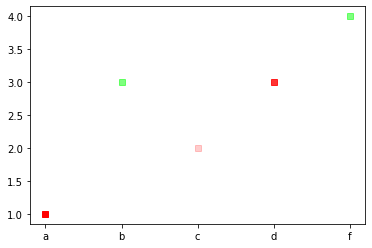

In [156]:
x_vals = ['a','b','c','d','f']
y_vals = [1,3,2,3,4]
colors = [(1,0,0,1),(0,1,0,.5),(1,0,0,.2),(1,0,0,.8),(0,1,0,.5)]
for i in range(5):
    plt.plot(x_vals[i],y_vals[i], 's',c = colors[i])

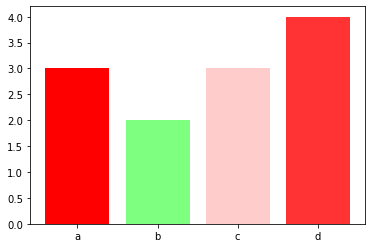

In [157]:
x_vals = ['a','b','c','d']
y_vals = [3,2,3,4]
colors = [(1,0,0,1),(0,1,0,.5),(1,0,0,.2),(1,0,0,.8)]
for i in range(4):
    plt.bar(x_vals[i], y_vals[i], color = colors[i])

### The solution

The good thing about these plots is that it allows to draw multiple times on a single frame. In this way, I can visualize data points for a pair of dates and draw the next row of data on top of it. Bar chart has an advantage of lettimg me specify the bottom of the bar for each data point.

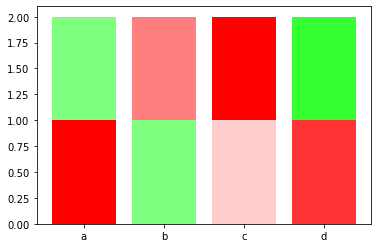

In [158]:
x_vals = ['a','b','c','d']
y_vals = 1
colors = [[(1,0,0,1),(0,1,0,.5),(1,0,0,.2),(1,0,0,.8),(0,1,0,.5)],[(0,1,0,.5),(1,0,0,.5),(1,0,0,1),(0,1,0,.8),(0,1,0,.75)]]
for j in range(len(colors)):
    for i in range(len(x_vals)):
        plt.bar(x_vals[i], y_vals,bottom=j, color=colors[j][i])

Now that I have the data cleaned, I can go with my creative plan of making a graph from these data. I decided to go with bar chart as the base of my plot but instead of having one bar for each company, I will have as many as needed for my delta_time values with the height of 1 and I will stack them on top of each other to represent a single bar that color changes within its way going up.

I was able to achieve my goal using the following code:

In [161]:
def plot_graph():
    """
    function to plot the graph based on the user input and the number of companies they enter
    """
    ######## Comment these lines for Jupyter #######
    #company_data = get_data()    
    #result = get_compared_datapoints(company_data)
    #dataframe = pd.DataFrame(result)           
    #new_dataframe= clean_dataframe(dataframe)
    
    cols = list(data_frame.columns)
    companies = list(data_frame.index)

    selection = int(input("Number of companies to compare: "))
    
    x_companies = companies[:selection]
    y_date = 1
    
    colors_data = data_frame.values[:selection]
    
    
    for j in range(colors_data.shape[1]):
        print(f'Day #{j} Done ...')
        for i in range(selection):
            #print(i,j,colors_data[i][j])
            plt.bar(x_companies[i], y_date,bottom=j, color=colors_data[i][j])
            


    new_cols = []
    i = 0
    for col in cols:
        new_cols.append('d'+str(i))
        i += 1
    
        
        
    data_frame.columns= new_cols
    
    plt.title(f"Correlation with {company}'s stock price change")
    plt.xticks(x_companies, rotation=90)
    plt.ylabel(f"From {start_date} to {till_date}")
    plt.xlabel("Companies")

In [ ]:
plot_graph()

# Reflection and Next Steps

I came up with a ton of learning points in this project and experienced lots of difficulties that took me out of my comfort zone. Dealing with large datasets and processing them for a specific use is really time consuming and mind intensive. I am happy with the result of this project so far but I believe the follwoing steps are necessary to make this program more uable:
- Since I convert a dictionary to a dataframe, there is no rule for sorting companies that dataframe understands, so when I select to compare the company with 10 companies, the selected companies have no special order in the dataframe. I have to define a process for sorting companies in the dataframe from largest to the smallest one.

- There is a bottle neck in this program at `get_compared_datapoints` function. This takes to much time when data files are large and the selected period of time is longe. I have to find a way to increase the efficiency and speed of the program.

- I think for having an insightful output, each company must be compared with at least top 100 companies in the database. However, it is not usable to put all the data to a single plot. Using subplots and dividing plots to 10 plot in which every one entails 10 companies can be more understandable for users. At the next step, I have to discover using of subplots.

- Though visualization helps to get a lot of information with a quick look, this data analysis can be useful when it is accompanied with some numerical values. For example having the percentage of green data points for each company can be so beneficial for having a more indepth study of the graph.